In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df=pd.read_csv(f"C:\\Users\\GAJAWADAYASHWANTH\\Downloads\\archive (1)\\Titanic-Dataset.csv")

In [7]:
print(df.head())  

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [8]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [10]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
#fillling the missing age values with median
df['Age'].fillna(df['Age'].median(),inplace=True)
#filling the missing embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
#drop cabin column as too many missing values
df.drop(columns=['Cabin'],inplace=True)

In [14]:
# Check to make sure all missing values are handled
print("Remaining missing values:\n",df.isnull().sum())


Remaining missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [15]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# View the first few rows to confirm encoding
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [16]:
# Drop columns that are not useful for prediction
df.drop(columns=['Name', 'Ticket'], inplace=True)

# Check the dataframe again
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [18]:
from sklearn.preprocessing import StandardScaler

num_features=['Age','Fare','SibSp','Parch']

scaler=StandardScaler()
df[num_features]=scaler.fit_transform(df[num_features])

In [20]:
# Check the result
df[['Age', 'Fare']].describe()

,Age,Fare
count,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18
std,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01
25%,-5.657365e-01,-4.891482e-01
50%,-1.046374e-01,-3.573909e-01
75%,4.333115e-01,-2.424635e-02
max,3.891554e+00,9.667167e+00


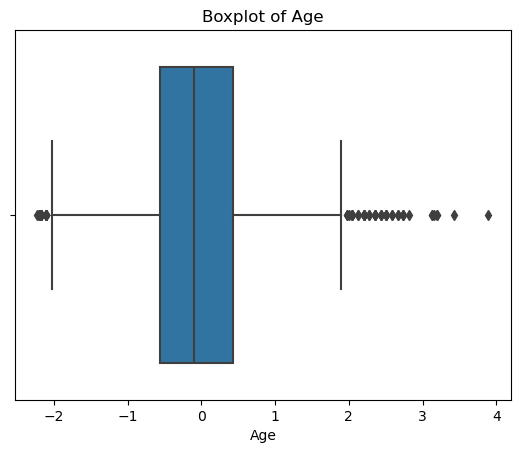

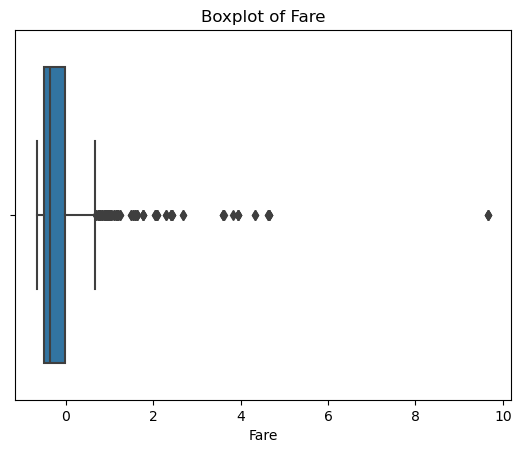

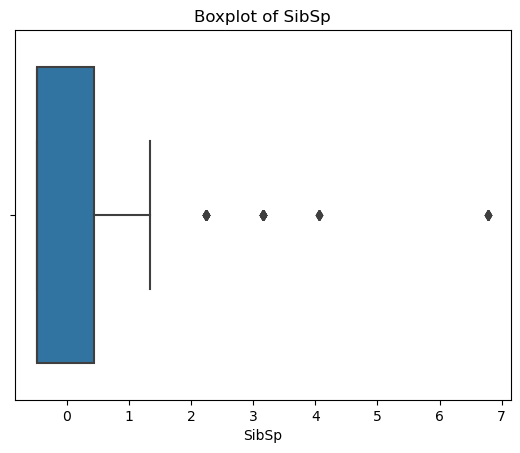

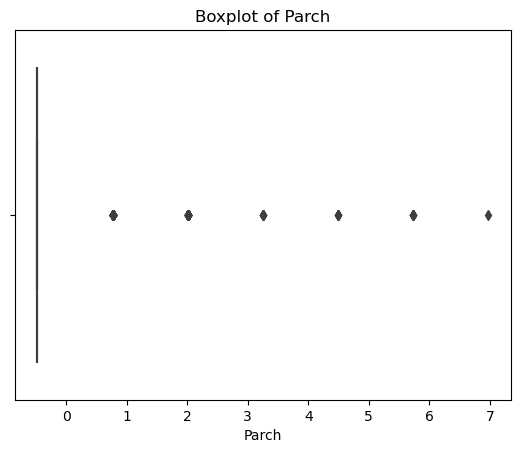

In [21]:
#Boxplots to detect outliers
for feature in num_features:
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [24]:
#IQR for Fare
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df=df[(df['Fare']>=lower)& (df['Fare']<=upper)]


In [26]:
#Final data after preprocessing
print(df.head())
print(df.shape)

   PassengerId  Survived  Pclass       Age     SibSp     Parch      Fare  \
0            1         0       3 -0.565736  0.432793 -0.473674 -0.502445   
2            3         1       3 -0.258337 -0.474545 -0.473674 -0.488854   
3            4         1       1  0.433312  0.432793 -0.473674  0.420730   
4            5         0       3  0.433312 -0.474545 -0.473674 -0.486337   
5            6         0       3 -0.104637 -0.474545 -0.473674 -0.478116   

   Sex_male  Embarked_Q  Embarked_S  
0      True       False        True  
2     False       False        True  
3     False       False        True  
4      True       False        True  
5      True        True       False  
(775, 10)


In [ ]:
++